In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(16,9))
import scipy.stats as stats
import env
from acquire import concat_csv_files
from prepare import prepare_df, create_features
from preprocessing import create_features, spotify_split

In [2]:
df = concat_csv_files()

### Summarize Data

In [3]:
df.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,36,Tay-K,0.792,0.594,2.0,...,0.351,82.512,232803.0,4.0,True,43.0,1.0,1.0,2J1hMj78HfdcMrmL2Sk6eR,single
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,55,Hypnotize Minds Productions,0.816,0.578,9.0,...,0.265,148.077,193920.0,4.0,True,61.0,1.0,11.0,2lwxcemR1muymEHNMblCpm,album
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,46,NMG/G-HUSET,0.649,0.798,0.0,...,0.717,160.011,254390.0,4.0,True,23.0,1.0,11.0,6va2RTYO2ois7t88RN0LhJ,album
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,71,Asylum/Warner Records,0.705,0.702,0.0,...,0.771,140.059,250493.0,4.0,True,62.0,1.0,9.0,6MQtWELG7aRX7CkAzQ6nLM,album
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,55,Hypnotize Minds Productions,0.838,0.793,11.0,...,0.800,160.003,261933.0,4.0,True,45.0,1.0,5.0,4QzaueQPQa0lqrMmQoh4v0,album


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            5974 non-null   object 
 1   album             5974 non-null   object 
 2   release_date      5974 non-null   object 
 3   track_name        5974 non-null   object 
 4   track_id          5974 non-null   object 
 5   album_popularity  5974 non-null   int64  
 6   label             5974 non-null   object 
 7   danceability      5973 non-null   float64
 8   energy            5973 non-null   float64
 9   key               5973 non-null   float64
 10  loudness          5973 non-null   float64
 11  mode              5973 non-null   float64
 12  speechiness       5973 non-null   float64
 13  instrumentalness  5973 non-null   float64
 14  liveness          5973 non-null   float64
 15  valence           5973 non-null   float64
 16  tempo             5973 non-null   float64


In [5]:
df = prepare_df(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5733 entries, 6mecZbKK3JDeMdFRNxsCV5 to 2gVtrY8gCCynR9v0lyBL1m
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   release_year            5733 non-null   int64  
 1   release_month           5733 non-null   object 
 2   release_day             5733 non-null   object 
 3   artist                  5733 non-null   object 
 4   album                   5733 non-null   object 
 5   release_date            5733 non-null   object 
 6   track_name              5733 non-null   object 
 7   album_popularity        5733 non-null   int64  
 8   label                   5733 non-null   object 
 9   danceability            5733 non-null   float64
 10  energy                  5733 non-null   float64
 11  key                     5733 non-null   int64  
 12  loudness                5733 non-null   float64
 13  mode                    5733 non-null   int64  
 14  speech

In [7]:
df = df.dropna()

In [8]:
# change explicit column to int
df['explicit'] = df.explicit.astype('int')
df['is_featured_artist'] = df.is_featured_artist.astype('int')
df['disc_number'] = df.disc_number.astype('int')
df['mode'] = df['mode'].astype('int')
df['key'] = df.key.astype('int')
df['duration_seconds'] = df.duration_seconds.astype('int')
df['duration_minutes'] = df.duration_minutes.astype('int')
df['duration_ms'] = df.duration_ms.astype('int')
df['popularity'] = df.popularity.astype('int')
df['time_signature'] = df.time_signature.astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5733 entries, 6mecZbKK3JDeMdFRNxsCV5 to 2gVtrY8gCCynR9v0lyBL1m
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   release_year            5733 non-null   int64  
 1   release_month           5733 non-null   object 
 2   release_day             5733 non-null   object 
 3   artist                  5733 non-null   object 
 4   album                   5733 non-null   object 
 5   release_date            5733 non-null   object 
 6   track_name              5733 non-null   object 
 7   album_popularity        5733 non-null   int64  
 8   label                   5733 non-null   object 
 9   danceability            5733 non-null   float64
 10  energy                  5733 non-null   float64
 11  key                     5733 non-null   int64  
 12  loudness                5733 non-null   float64
 13  mode                    5733 non-null   int64  
 14  speech

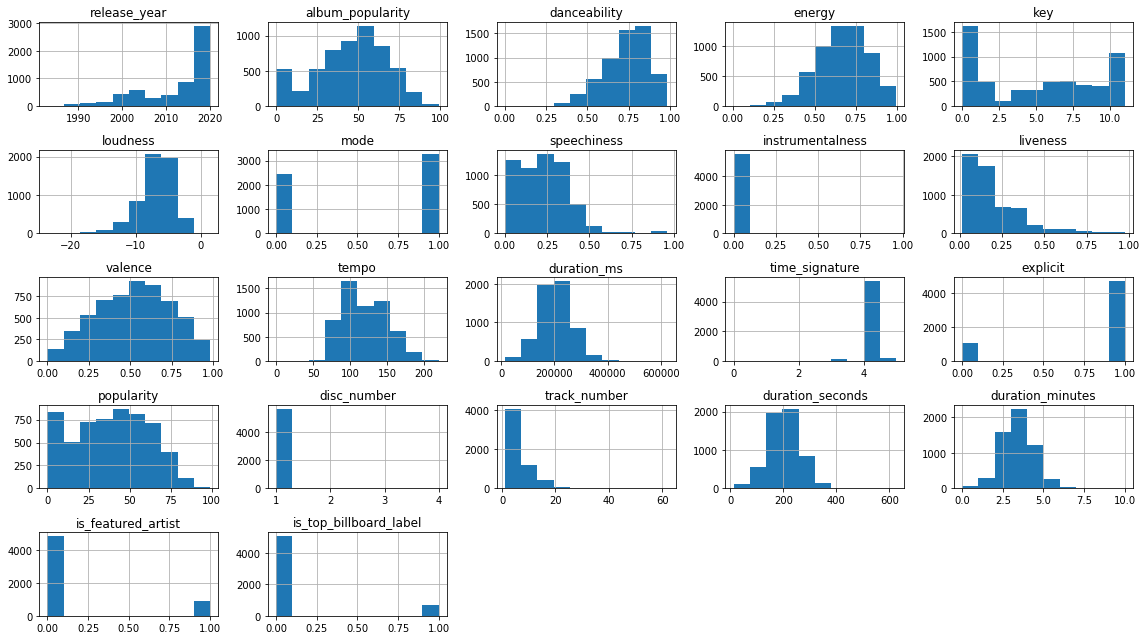

In [10]:
# distribution of variables
df.hist()
plt.tight_layout()

In [11]:
# value counts for all variables except 2
for col in df.drop(columns=['artist', 'album']).columns:
    print(df[col].value_counts(),'\n')

2020    1301
2019     564
2017     510
2018     505
2016     289
2014     241
2015     209
2005     179
2004     155
2012     139
2003     128
2013     124
1999     120
2001     118
2010     113
2007     107
2006     105
2000     102
2002     100
2011      83
1998      83
2009      66
2008      64
1997      61
1996      44
1994      41
1993      40
1995      37
1988      29
1990      26
1992      21
1986      12
1991       7
1987       4
1989       3
1985       2
1983       1
Name: release_year, dtype: int64 

01    858
11    613
10    593
09    535
08    456
05    430
03    411
07    405
04    401
06    388
12    377
02    266
Name: release_month, dtype: int64 

01    876
15    256
16    224
25    211
27    198
06    195
17    189
11    188
07    187
28    186
13    185
03    181
04    176
22    172
26    171
30    160
20    158
21    155
10    152
12    148
18    143
19    142
14    141
24    132
08    131
29    127
23    124
02    120
05    105
09    103
31     97
Name: release_day,

In [12]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')
train.head(3)

Shape of train: (4012, 31) | Shape of validate: (861, 31) | Shape of test: (860, 31)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


,release_year,release_month,release_day,artist,album,release_date,track_name,album_popularity,label,danceability,...,popularity,disc_number,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,decade,is_top_billboard_label
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,2019,04,19,lil peep,star shopping,2019-04-19,star shopping,80,Lil Peep,0.585,...,87,1,1,1dEpGPZONvmwYlE2jDOWOM,single,142,2,0,2010s,0
0HO8pCseEpgozNi3z0R4bc,2015,03,17,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,26,Awful Records,0.833,...,24,1,11,1ecx4skUBpk31GDJlMXi3X,album,120,2,0,2010s,0
643K3eEgRvdJiXjSzlz7dg,1998,08,11,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,36,Relativity Records,0.471,...,30,1,2,3kaX938EVrZuYE1JpNhZIW,album,252,4,0,90s,0


In [13]:
train.head()

,release_year,release_month,release_day,artist,album,release_date,track_name,album_popularity,label,danceability,...,popularity,disc_number,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,decade,is_top_billboard_label
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,2019,04,19,lil peep,star shopping,2019-04-19,star shopping,80,Lil Peep,0.585,...,87,1,1,1dEpGPZONvmwYlE2jDOWOM,single,142,2,0,2010s,0
0HO8pCseEpgozNi3z0R4bc,2015,03,17,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,26,Awful Records,0.833,...,24,1,11,1ecx4skUBpk31GDJlMXi3X,album,120,2,0,2010s,0
643K3eEgRvdJiXjSzlz7dg,1998,08,11,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,36,Relativity Records,0.471,...,30,1,2,3kaX938EVrZuYE1JpNhZIW,album,252,4,0,90s,0
08EabdvPIHC4KBW7LfynPP,1993,10,12,salt-n-pepa,very necessary,1993-10-12,no one does it better,64,Mercury Records,0.874,...,26,1,2,2W2EmEpud13QHlhCFS9P8g,album,234,3,0,90s,0
6B2ZDVgJ0lHLgV9xC2PAJh,2001,10,22,dungeon family,even in darkness,2001-10-22,white gutz (feat. bubba sparxxx),42,Arista,0.857,...,23,1,9,2n4GKr0nKfFWoSTWZuNB9Z,album,266,4,1,2000s,0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 30bqVoKjX479ab90a8Pafp to 70CYAL35X3T73qVStJNpZ2
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   release_year            4012 non-null   int64  
 1   release_month           4012 non-null   object 
 2   release_day             4012 non-null   object 
 3   artist                  4012 non-null   object 
 4   album                   4012 non-null   object 
 5   release_date            4012 non-null   object 
 6   track_name              4012 non-null   object 
 7   album_popularity        4012 non-null   int64  
 8   label                   4012 non-null   object 
 9   danceability            4012 non-null   float64
 10  energy                  4012 non-null   float64
 11  key                     4012 non-null   int64  
 12  loudness                4012 non-null   float64
 13  mode                    4012 non-null   int64  
 14  speech

In [15]:
cat_vars = ['key', 'mode', 'time_signature', 'explicit', 'disc_number',
            'is_featured_artist']
cont_vars = ['danceability', 'energy', 'loudness', 'speechiness', 
             'instrumentalness', 'liveness', 'valence','tempo', 
             'duration_seconds']

In [16]:
#Continuous variable relationships with Popularity
#sns.pairplot(data=train[cont_vars + ['popularity']])
#plt.tight_layout()

<div class="alert alert-block alert-info">Takeaways: 
    <li>We may find some useful clusters since there is some spread in the variable relationships</li>
<li>There's no apparent linear relationships with popularity</li>
<li>more data is definitely needed</li>
<li>seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)</li>
</div>

---

In [ ]:
#Categorical variable relationships with Popularity
sns.pairplot(data=train[cat_vars + ['popularity']])
plt.tight_layout()

<div class="alert alert-block alert-info">Takeaways: 
<li>popularity seems to decrease with disc number</li>
<li>a higher time signature seems to indicate higher popularity, namely '4'</li>
</div>

---

In [ ]:
train.nunique()

<div class="alert alert-block alert-info">Takeaways<br><br>
    Categorical variables
   <li> key</li>
    <li> mode</li>
    <li> time_signature</li>
    <li> explicit</li>
        <br>
    Continuous variables
    <li> danceability</li>
    <li> energy</li>
    <li> loudness</li>
    <li> speechiness</li>
    <li> instrumentalness</li>
    <li> liveness</li>
    <li> valence</li>
    <li> tempo</li>
    <li> duration_ms</li>
    </div>

---

In [ ]:
train.describe()

<div class="alert alert-block alert-info">Takeaways: 
<li> We may find some useful clusters since there is some spread in the variable relationships</li>
<li> There's no apparent linear relationships with popularity</li>
<li> more data is definitely needed</li>
<li> seems to be some positive correlation between loudness/energy, danceability/valence (hypo-test)</li></div>

In [ ]:
train.head()

---
# Correlation Tests: Linear correlation with Popularity

In [ ]:
train[cont_vars + ['popularity']].corr()['popularity'].sort_values(ascending=False)

In [ ]:
plt.title('Train Variable Correlations')
plt.rc('figure', figsize=(16,9))
sns.heatmap(train.corr(), annot=True, mask= np.triu(np.ones_like(train.corr(), dtype=np.bool)))

> **Does liveness have any correlation with a song's popularity?**

In [ ]:
sns.regplot(x='liveness', y='popularity', data=train)

- $H_0$: There is no linear relationship between liveness and popularity.
- $H_a$: There is a linear relationship between liveness and popularity.

In [ ]:
null = 'there is no linear relationship between liveness and popularity'

x = train.liveness
y = train.popularity

alpha = .05

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

if p < alpha:
    print('We reject the null that', null)
else:
    print('We fail to reject the null that', null)

<div class="alert alert-block alert-info">Conclusion: Liveness and popularity have a small negative linear relationship, <b>r: -.07</b></div>

---

> **Does song length have any correlation with a song's popularity?**

In [ ]:
sns.regplot(x='duration_ms', y='popularity', data=train)

- $H_0$: There is no linear relationship between song length and popularity.
- $H_a$: There is a linear relationship between song length and popularity.

In [ ]:
null = 'there is no linear relationship between song length and popularity'

x = train.duration_ms
y = train.popularity

alpha = .05

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

if p < alpha:
    print('We reject the null that', null)
else:
    print('We fail to reject the null that', null)

<div class="alert alert-block alert-info">Conclusion: Song length and popularity have a small negative linear relationship, <b>r: -.07</b></div>

---

# T-Tests: Comparing Mean Popularity

> **Is the mean popularity of songs with time signature 4 significantly greater than the mean popularity of all songs(within the train data)?**

In [ ]:
sns.boxplot(x='time_signature', y='popularity', data=train)

In [ ]:
plt.subplot(211)
plt.title('Distrubution of all song Popularity')
train.popularity.hist()

plt.subplot(212)
plt.title('Distrubution of Time Signature 4 Popularity')
train[train.time_signature == 4].popularity.hist(label='time sig 4')
plt.tight_layout()

In [ ]:
train.time_signature.value_counts()

**Hypothesis**

$H_{0}$: Mean of popularity of time signature 4 =< Mean of popularity of all songs

$H_{a}$: Mean of popularity of time signature 4 > Mean of popularity of all songs

In [ ]:
null = 'the mean of popularity of time signature 4 =< mean of popularity of all songs'

sample = train[train.time_signature == 4].popularity
overall = train.popularity.mean()

alpha = .05

t, p = stats.ttest_1samp(sample, overall)
print('t =', t)
print('p =', p)

if p/2 > alpha:
    print('We fail to reject the null that', null)
elif t < 0:
    print('We fail to reject the null that', null)
else:
    print('We reject the null that', null)
    
print('Overall mean', overall, '\n Sample mean', sample.mean())

<div class="alert alert-block alert-info">Conclusion: The mean popularity of time signature 4 is not significantly greater than the overall mean popularity</div>

---

> **Do tracks in a major key tend to be more popular than tracks in a minor key?**

In [ ]:
sns.boxplot(x='mode', y='popularity', data=train)

In [ ]:
plt.subplot(211)
plt.title('Distrubution of Major key song Popularity')
train[train['mode'] == 1].popularity.hist()
plt.subplot(212)
plt.title('Distrubution of Minor key song Popularity')
train[train['mode'] == 0].popularity.hist()

In [ ]:
train['mode'].value_counts()

In [ ]:
print(train[train['mode'] == 1].popularity.var())
print(train[train['mode'] == 0].popularity.var())

**Hypothesis**

$H_{0}$: Mean of popularity of major key songs =< Mean of popularity of minor key songs

$H_{a}$: Mean of popularity of major key songs > Mean of popularity of minor key songs

In [ ]:
null = 'the mean of popularity of time signature 4 =< mean of popularity of all songs'

major = train[train['mode'] == 1].popularity
minor = train[train['mode'] == 0].popularity

alpha = .05

t, p = stats.ttest_ind(major, minor)
print('t =', t)
print('p =', p)

if p/2 > alpha:
    print('We fail to reject the null that', null)
elif t < 0:
    print('We fail to reject the null that', null)
else:
    print('We reject the null that', null)
    
print('Major mean', major.mean()) 
print('Minor mean', minor.mean())

<div class="alert alert-block alert-info">Conclusion: The mean popularity of major key songs is not significantly greater than the mean popularity of minor key songs </div>

---

- is there a significant difference in highest popularity group vs lowest pop group in tempo? T-test (replace tempo with other features as well, possible create a loop)